# Ultimate Pig -- W3D3 Homework

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class Dice:

    def dice_roll(self):
        roll = random.randint(1, 6)
        return roll
    
    
class Game:

    def __init__(self):
        self.computer1 = Basic_Computer_Player()
        self.computer2 = Basic_Computer_Player()

    def play_round(self):
        x = self.computer1.computer_turn()
        y = self.computer2.computer_turn()
        computer1_score = x
        computer2_score = y
        round_scores = [computer1_score, computer2_score]
        #print("1", computer1_score)
        #print("2", computer2_score)
        return round_scores
        
    def play_game(self):
        computer1_score = 0
        computer2_score = 0
        rounds_counter = 0
        while rounds_counter < 7:
            w = self.play_round()
            rounds_counter += 1
            computer1_score += w[0]
            computer2_score += w[1]
        #print(computer1_score, computer2_score)
        if computer1_score > computer2_score:
            return 1
        elif computer1_score < computer2_score:
            return -1
        else:
            return 0
        
    def play_n_games(self, num=3):
        return [self.play_game() for _ in range(num)]
    
    def run_n_trials(self, trials=4, num=3):
        return [self.play_n_games(num) for _ in range(trials)]
    
    
class Basic_Computer_Player:

    def __init__(self):
        pass

    def computer_roll(self):
        computer_dice = Dice()
        self.computer_curve = computer_dice.dice_roll()
        return self.computer_curve

    def hold_action(self):
        computer_choice = 'h'
        return computer_choice

    def computer_turn(self):
        computer_turn_bank = 0
        computer_to_roll = True
        while computer_to_roll == True:
            computer_roll_num = self.computer_roll()
            if computer_roll_num == 1:
                computer_turn_bank = 0
                computer_to_roll = False
                return computer_turn_bank
            else:
                computer_turn_bank += computer_roll_num
                computer_decision = self.hold_action()
                if computer_decision == 'h':
                    computer_to_roll = False
                    return computer_turn_bank
                else:
                    computer_to_roll = True

In [4]:
class Roll_Bot(Basic_Computer_Player):

    def computer_turn(self):
        computer_turn_bank = 0
        computer_to_roll = True
        roll_number = 0
        while computer_to_roll == True:
            computer_roll_num = self.computer_roll()
            roll_number += 1
            if computer_roll_num == 1:
                computer_turn_bank = 0
                computer_to_roll = False
                return computer_turn_bank
            else:
                computer_turn_bank += computer_roll_num
                if roll_number == 4:
                    computer_decision = "h"
                else:
                    computer_decision = "r"
                if computer_decision == 'h':
                    computer_to_roll = False
                    return computer_turn_bank
                else:
                    computer_to_roll = True

In [5]:
def win_count(lst):
    p1_wins = 0
    p2_wins = 0
    ties = 0
    for x in lst:
        for y in x:
            if y == 1:
                p1_wins +=1
            elif y == -1:
                p2_wins += 1
            else:
                ties += 1
    return [p1_wins, p2_wins, ties]

In [6]:
game = Game()

In [7]:
trial_results = game.run_n_trials(1000, 100)
win_results = win_count(trial_results)

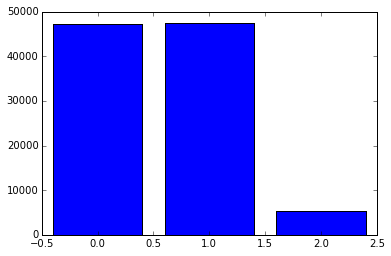

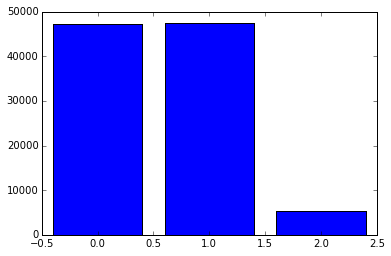

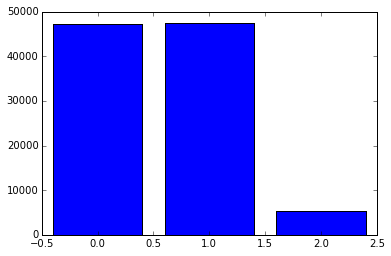

In [12]:
plt.bar(range(len(win_results)), win_results, align='center')
plt.show()

This is a test of my Basic_Computer_Player class, where both players in the game are from this class.  The bot here only rolls one time, then holds.  The results show, through 1,000 trials of 100 games each, that no player has any real advantage.  This is not surprising since the result is basically dependent on the luck of the first roll.

In [ ]:
game.play_game()

In [ ]:
smart_one_reuslt = game.run_n_trials(1000, 100)
smart_one_wins = win_count(smart_one_reuslt)

In [ ]:
x1 = ["Basic Bot Wins", "Roll Bot Wins", "Ties"]
plt.bar(range(len(smart_one_wins)), smart_one_wins, align='center')
plt.xticks(range(len(smart_one_wins)), x1)
plt.title("Basic Computer Player Test Results")
plt.ylabel("Occurances")
plt.show()